## ADVANCE REGRESSION ASSIGNMENT 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load dataset
house = pd.read_csv('train.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking shape 
house.shape

(1460, 81)

In [5]:
# checking info for datatype and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# checking % of missing value
round((house.isnull().sum()/len(house))*100,2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [7]:
# Describe numerical variables
house.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Dropping high % of missing value and ID 
house = house.drop(['PoolQC', 'MiscFeature','Alley', 'Fence','Id'],axis = 1)

In [9]:
# checking % of missing value
round((house.isnull().sum()/len(house))*100,2).sort_values(ascending=False).head(20)

FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
YearBuilt        0.00
Exterior2nd      0.00
Exterior1st      0.00
ExterQual        0.00
ExterCond        0.00
dtype: float64

In [10]:
# convert years to age
house['YearBuilt_Old'] = house.YearBuilt.max()-house.YearBuilt
house['YearRemodAdd_Old'] = house.YearRemodAdd.max()-house.YearRemodAdd
house['GarageYrBlt_Old'] = house.GarageYrBlt.max()-house.GarageYrBlt
house['YrSold_Old'] = house.YrSold.max()-house.YrSold
house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
60,2004,2004,2006.0,2006,6,6,4.0,4
532,1955,2007,1967.0,2010,55,3,43.0,0
398,1920,1950,1920.0,2007,90,60,90.0,3
736,1950,1950,1949.0,2006,60,60,61.0,4
264,1925,2004,1965.0,2008,85,6,45.0,2
265,1981,1981,1981.0,2008,29,29,29.0,2
900,1971,1971,1979.0,2007,39,39,31.0,3
785,1967,1967,1967.0,2009,43,43,43.0,1
1384,1939,1950,1939.0,2009,71,60,71.0,1
1090,1950,1950,1987.0,2009,60,60,23.0,1


In [11]:
# dropping columns
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis= 1)

In [12]:
# fills all  numercial column with its own most frequent value
house = house.apply(lambda x:x.fillna(x.value_counts().index[0])) 

#fill NaN with the most frequent value from that column.
house = house.fillna(house['GarageFinish'].value_counts().index[0]) 
house = house.fillna(house['BsmtQual'].value_counts().index[0])
house = house.fillna(house['GarageType'].value_counts().index[0])
house = house.fillna(house['GarageQual'].value_counts().index[0])
house = house.fillna(house['GarageCond'].value_counts().index[0])
house = house.fillna(house['BsmtCond'].value_counts().index[0])
house = house.fillna(house['BsmtExposure'].value_counts().index[0])
house = house.fillna(house['BsmtFinType1'].value_counts().index[0])
house = house.fillna(house['FireplaceQu'].value_counts().index[0])

In [13]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,10,10,10.0,2


In [14]:
# check for missing value percentage
round((house.isnull().sum()/len(house))*100,2).sort_values(ascending=False).head(20)

YrSold_Old         0.0
BsmtCond           0.0
Exterior2nd        0.0
MasVnrType         0.0
MasVnrArea         0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           0.0
BsmtExposure       0.0
GarageYrBlt_Old    0.0
BsmtFinType1       0.0
BsmtFinSF1         0.0
BsmtFinType2       0.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
Exterior1st        0.0
RoofMatl           0.0
dtype: float64

## Outlier Treatment

Text(0.5, 1.0, 'Sale Price vs Garage Cars')

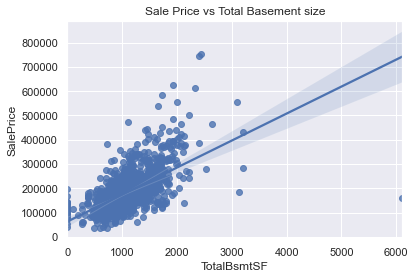

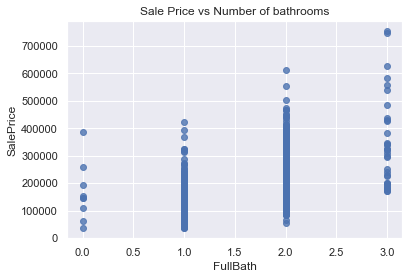

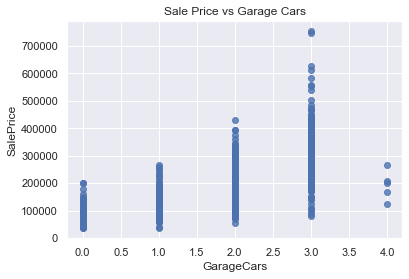

In [15]:
plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=house)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=house, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=house, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

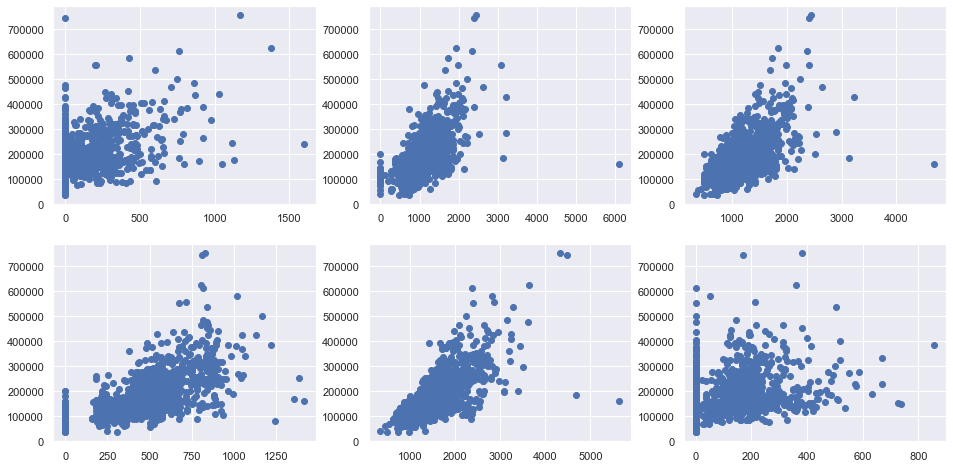

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house.MasVnrArea,house.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house.TotalBsmtSF,house.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house['1stFlrSF'],house.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house['GarageArea'],house.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house['GrLivArea'],house.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house['WoodDeckSF'],house.SalePrice)

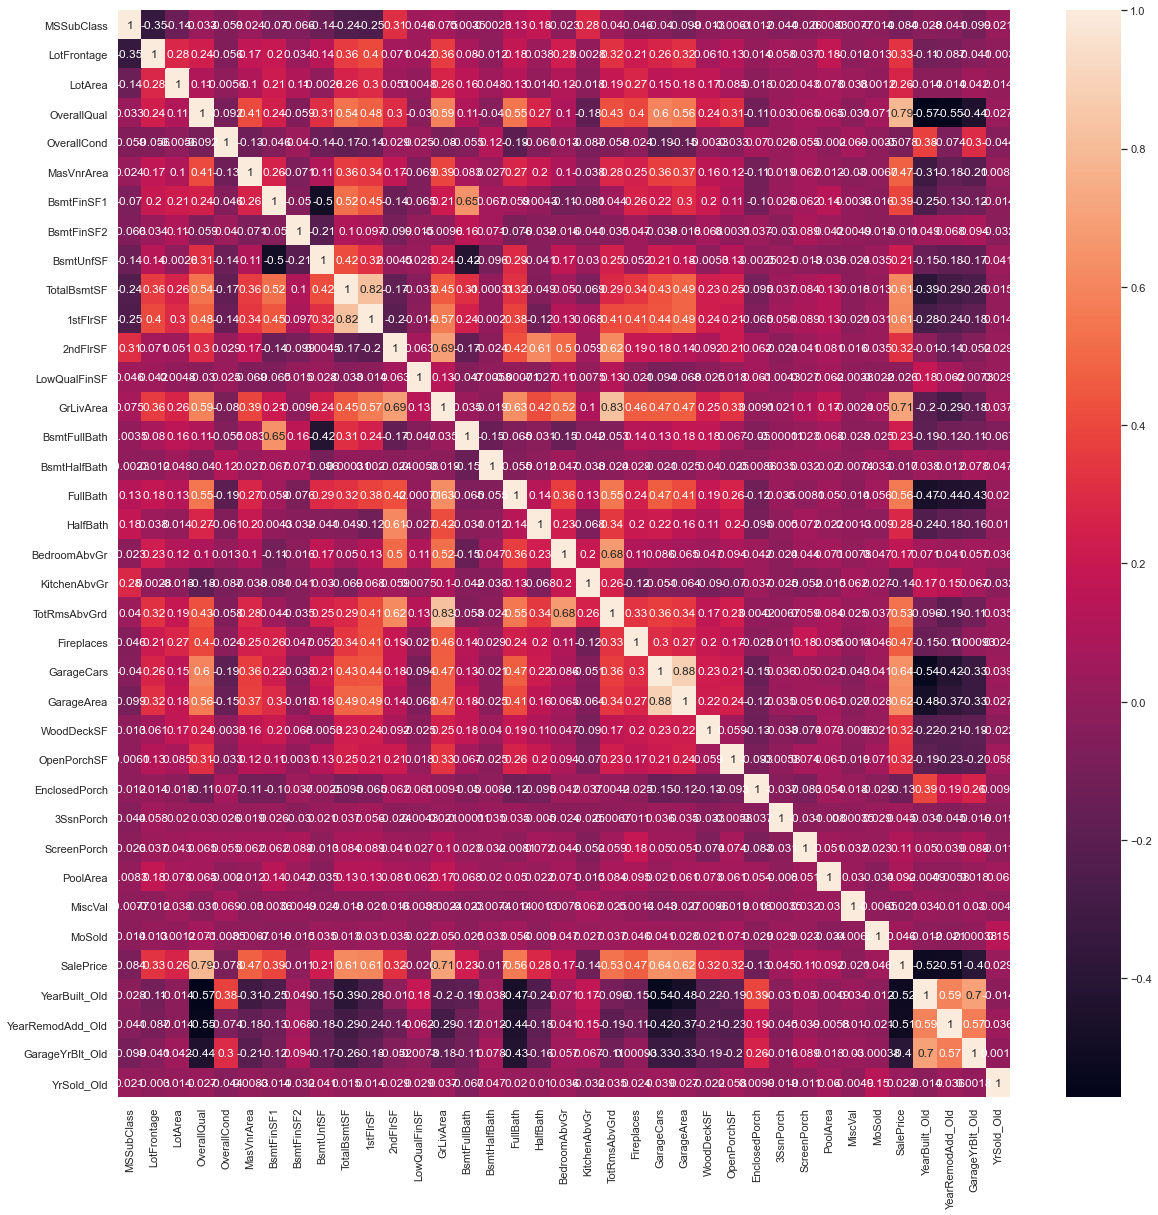

In [17]:
# finding correlations
plt.figure(figsize=(20,20))
sns.heatmap(house[list(house.dtypes[house.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [18]:
numeric_column = list(house.dtypes[house.dtypes !='object'].index)
numeric_column = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def outliers(x):
    list = []
    for col in numeric_column:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = outliers(house)

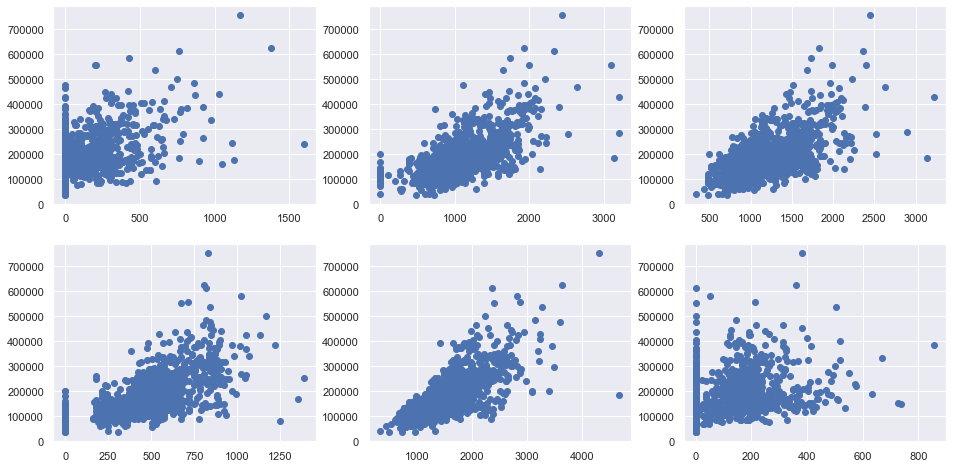

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house.MasVnrArea,house.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house.TotalBsmtSF,house.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house['1stFlrSF'],house.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house['GarageArea'],house.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house['GrLivArea'],house.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house['WoodDeckSF'],house.SalePrice)

In [20]:
# finding Categorical features
house[list(house.dtypes[house.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
# Ordinal Features
house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [22]:
# Mapping Ordinal Variables
house['LandSlope'] = house.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtQual'] = house.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtCond'] = house.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['CentralAir'] = house.CentralAir.map({'N':0,'Y':1})
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['GarageFinish'] = house.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house['GarageQual'] = house.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['GarageCond'] = house.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house['FireplaceQu'] = house.FireplaceQu.map({'Gd':0,'TA':1,'Fa':2,'Ex':3,'Po':4})


In [23]:
house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','FireplaceQu']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape,FireplaceQu
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3,0
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3,1
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0,1
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0,1


In [24]:
# create dummy columns and dropping columns
dummy_col = pd.get_dummies(house[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house = pd.concat([house,dummy_col],axis='columns')

house = house.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

###  Normality and linearity


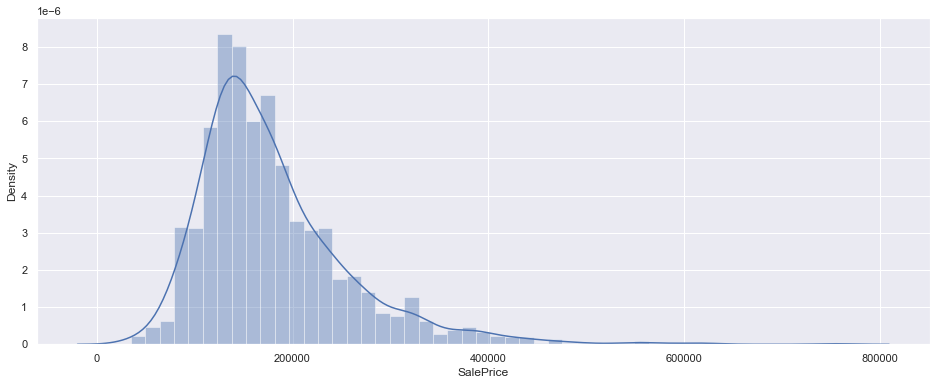

In [25]:
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

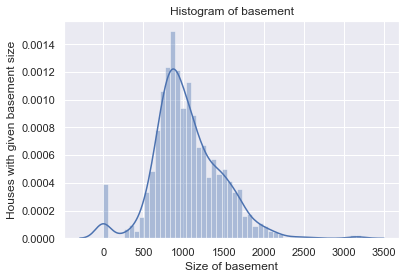

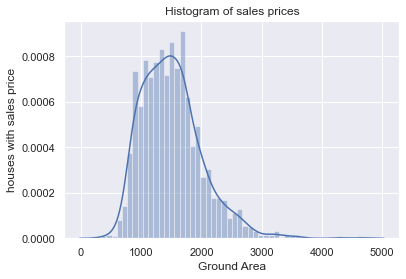

In [26]:
plt.figure(1)

sns.distplot(house['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Houses with given basement size") 
plt.title("Histogram of basement")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(house['GrLivArea'], 50)
plt.xlabel("Ground Area")
plt.ylabel("houses with sales price") 
plt.title("Histogram of sales prices")
plt.grid(True) 
plt.show()

### Standardisation of datasets¶


Distributions of above are skewed, the data needs to be standardised so individual features are more or less look like standard normally distributed data, A log transofrmation can be applied for standardization

In [27]:
house_new = house.drop(house[house['TotalBsmtSF']==0].index, axis =0)

house_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea']] = np.log(house_new[['SalePrice','TotalBsmtSF','GrLivArea']])

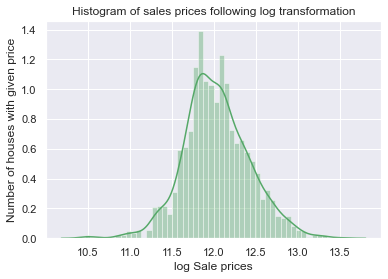

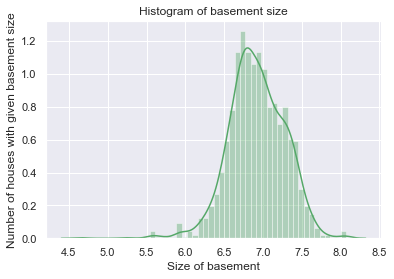

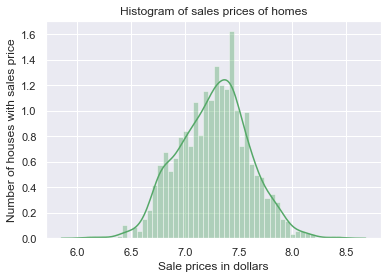

In [28]:
plt.figure(1)
sns.distplot(house_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(house_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(house_new['GrLivArea'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

Text(0.5, 1.0, 'Log Sale Price vs Log Total Basement size')

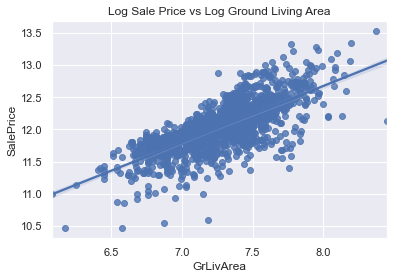

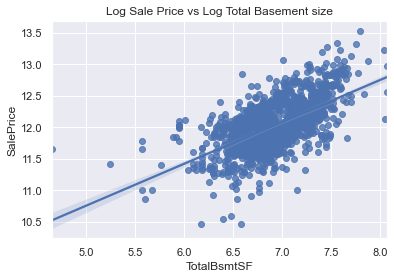

In [29]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=house_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=house_new)
plt.title('Log Sale Price vs Log Total Basement size')

The dense clutter in the scatter plots are now shifted towards the centre following log transormation.

In [30]:
# Dropping Utilities and Street column.
house_new = house.drop(['Utilities','Street'],axis = 1)

In [31]:
house_new.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0


In [32]:
house_new.shape

(1441, 196)

In [33]:
# split the daataset for train and test
df_train,df_test = train_test_split(house_new,train_size=0.7,test_size=0.3,random_state=42)

##   Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [35]:
house_new.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,56.818182,67.903539,10025.664816,1.945177,0.057599,6.092991,5.571131,102.775156,2.394865,2.081888,...,0.003470,0.003470,0.083969,0.002082,0.866759,0.002776,0.007634,0.013879,0.820958,0.086051
std,42.187465,21.098670,5463.989139,1.409952,0.258494,1.379296,1.110230,180.089513,0.571500,0.347948,...,0.058823,0.058823,0.277438,0.045596,0.339953,0.052631,0.087067,0.117030,0.383521,0.280537
min,20.000000,21.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,0.000000,0.000000,5.000000,5.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,63.000000,9439.000000,3.000000,0.000000,6.000000,5.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11500.000000,3.000000,0.000000,7.000000,6.000000,164.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,70761.000000,3.000000,2.000000,10.000000,9.000000,1600.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

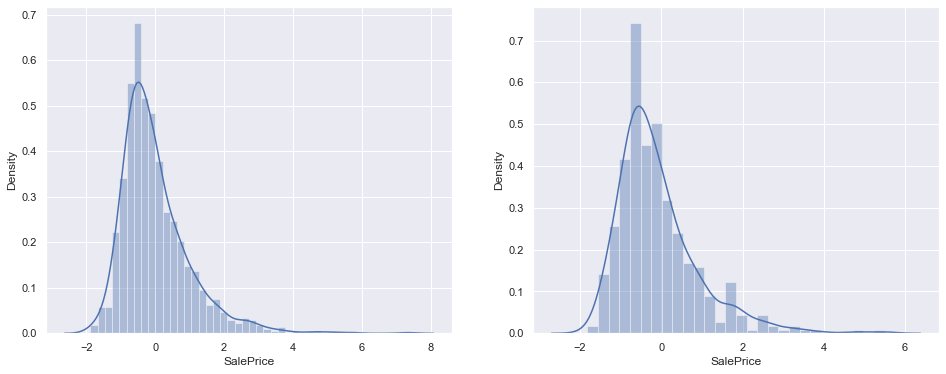

In [36]:
# Checking distribution of saleprice
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [37]:
#Seperating dependent and independent for training set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [38]:
#Seperating dependent and independent for test set
y_test = df_test.pop('SalePrice')
X_test = df_test

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 1180 to 1138
Columns: 195 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(32), int64(20), uint8(143)
memory usage: 558.1 KB


###  7. Feature Selection Using RFE

In [41]:
# feature selection
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,40)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [42]:
#Saving the selected feature list in the col variable
col = X_train.columns[rfe.support_]

In [43]:
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual',
       'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Condition1_RRAe', 'Condition2_PosN',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_WdShngl',
       'Exterior1st_CBlock', 'Exterior1st_Stucco', 'Exterior2nd_CBlock',
       'Foundation_Stone', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_Wall', 'Functional_Sev', 'SaleType_ConLI', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [44]:
X_train = X_train[col]
X_test = X_test[col]

###  Building a linear model

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# linear regression
import sklearn.metrics as metrics
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8688745529327356

In [47]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.534845600263211e+20

 This is highly overfitted model thus to overcome this we will use regularization

## Lasso Regression

In [48]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8704133269979331
0.8400954327541326


In [49]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols =df_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.468),
 ('MSSubClass', 0.284),
 ('LotFrontage', 0.177),
 ('LotArea', 0.036),
 ('LotShape', -0.0),
 ('LandSlope', 0.097),
 ('OverallQual', 0.0),
 ('OverallCond', 0.005),
 ('MasVnrArea', -0.033),
 ('ExterQual', 0.369),
 ('ExterCond', 0.218),
 ('BsmtQual', -0.025),
 ('BsmtCond', -0.202),
 ('BsmtExposure', -0.185),
 ('BsmtFinType1', -0.146),
 ('BsmtFinSF1', -0.179),
 ('BsmtFinType2', -0.152),
 ('BsmtFinSF2', 0.46),
 ('BsmtUnfSF', -0.317),
 ('TotalBsmtSF', -0.205),
 ('HeatingQC', -0.134),
 ('CentralAir', -0.165),
 ('1stFlrSF', -2.096),
 ('2ndFlrSF', -0.376),
 ('LowQualFinSF', -0.242),
 ('GrLivArea', -0.254),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 1.458),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.0),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', -0.043),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.0),
 ('GarageCars', -0.079),
 ('GarageArea', -0.196),
 ('GarageQual', 0.272),
 ('GarageCond', 0.0)]

In [50]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034800,3.310943e-03,0.003199,0.000401,0.001,{'alpha': 0.001},0.869747,0.848311,0.766461,0.860563,...,0.839855,0.037379,1,0.870009,0.872110,0.874460,0.872234,0.874002,0.872563,0.001582
1,0.006801,7.503295e-04,0.002400,0.000490,0.01,{'alpha': 0.01},0.856032,0.807069,0.725925,0.844031,...,0.811454,0.045925,2,0.820576,0.829607,0.846747,0.819091,0.820725,0.827349,0.010386
2,0.004000,3.504023e-07,0.002399,0.000490,1,{'alpha': 1.0},-0.009511,-0.000028,-0.002375,-0.007641,...,-0.004298,0.003629,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.004000,8.869684e-07,0.002600,0.000491,5,{'alpha': 5.0},-0.009511,-0.000028,-0.002375,-0.007641,...,-0.004298,0.003629,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003800,4.002575e-04,0.002600,0.000490,10,{'alpha': 10.0},-0.009511,-0.000028,-0.002375,-0.007641,...,-0.004298,0.003629,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


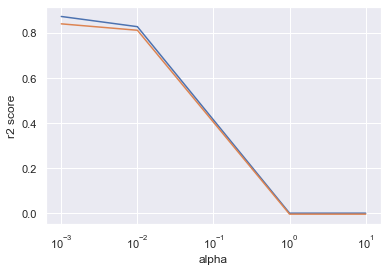

In [52]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [53]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [54]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8704133269979331
0.8400954327541326


In [55]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
lasso = pd.DataFrame(list(zip(cols, model_parameters)))
lasso.columns = ['features','coef']

In [56]:
lasso.sort_values(by='coef',ascending=False).head(10)

,features,coef
28,FullBath,1.458
17,BsmtFinSF2,0.460
9,ExterQual,0.369
1,MSSubClass,0.284
39,GarageQual,0.272
10,ExterCond,0.218
2,LotFrontage,0.177
5,LandSlope,0.097
3,LotArea,0.036
30,BedroomAbvGr,0.015


### Ridge Regression

In [57]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8748988367640218
0.8290403626422439


##### Use Grid SearchCV to get optimal value of alpha 

In [58]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005506,0.001498,0.002898,0.001135,0.001,{'alpha': 0.001},0.807383,0.893293,0.740578,0.856255,...,0.884896,0.876472,0.872550,0.877273,0.870334,0.888937,0.873592,0.871232,0.876553,0.005854
1,0.006544,0.006242,0.002290,0.001259,0.01,{'alpha': 0.01},0.807917,0.893245,0.743287,0.856224,...,0.884893,0.876471,0.872549,0.877272,0.870333,0.888936,0.873592,0.871232,0.876552,0.005854
2,0.004300,0.000640,0.002701,0.000459,0.1,{'alpha': 0.1},0.811925,0.892758,0.766090,0.855928,...,0.884603,0.876403,0.872481,0.877200,0.870257,0.888911,0.873517,0.871163,0.876462,0.005832
3,0.003999,0.000002,0.002801,0.000400,0.2,{'alpha': 0.2},0.814608,0.892203,0.784487,0.855619,...,0.883924,0.876226,0.872303,0.877012,0.870061,0.888847,0.873322,0.870984,0.876237,0.005790
4,0.004100,0.000300,0.002600,0.000490,0.5,{'alpha': 0.5},0.818253,0.890501,0.815504,0.854804,...,0.881108,0.875337,0.871412,0.876072,0.869091,0.888529,0.872333,0.870085,0.875180,0.005705


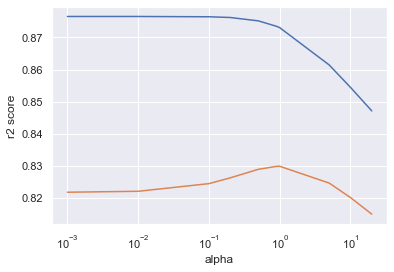

In [60]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [61]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [62]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.872111256153362
0.8375442167529433


In [63]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [64]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
28,HalfBath,1.375851
17,BsmtUnfSF,0.467071
39,GarageCond,0.410047
27,FullBath,0.304202
1,LotFrontage,0.276137
10,BsmtQual,0.213174
9,ExterCond,0.206863
36,GarageCars,0.203752
26,BsmtHalfBath,0.165301
7,MasVnrArea,0.148662


After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination thus using it as final model.

## Final Model


In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8704133269979331
0.8400954327541326


After compairing both the model we can see that the below Features are best explaining the DataSet


FullBath	
BsmtFinSF2	
ExterQual	
MSSubClass	
GarageQual

- Best alpha value for Lasso : {'alpha': 0.001}
- Best alpha value for Ridge : {'alpha':1.0}